In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback

Using TensorFlow backend.


### Load the MNIST dataset

In [2]:
from keras.datasets import mnist

SEED = 2017

### Split data into test and train sets

In [3]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


### Show an example of each label and print the count per label:

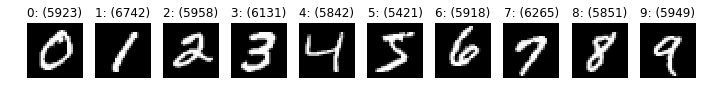

In [4]:
# Plot first image of each label
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))

i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()

### Preprocess the data

In [5]:
# Normalize data
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

# One-Hot-Encode labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

# Flatten data - we threat the image as a sequential array of values
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

### Define the model with the sigmoid activation function

In [6]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid')) 
model_sigmoid.add(Dense(350, activation='sigmoid')) 
model_sigmoid.add(Dense(100, activation='sigmoid')) 
model_sigmoid.add(Dense(10, activation='softmax'))

# Compile model with SGD
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Define the model with the ReLU activation function

In [7]:
model_relu = Sequential()
model_relu.add(Dense(700, input_dim=784, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(700, activation='relu')) 
model_relu.add(Dense(350, activation='relu')) 
model_relu.add(Dense(100, activation='relu')) 
model_relu.add(Dense(10, activation='softmax'))

# Compile model with SGD
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Create a callback function to store the loss values per batch

In [8]:
class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

### Run models

In [11]:
n_epochs = 10
batch_size = 256
validation_split = 0.2

history_sigmoid = history_loss()
model_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, callbacks=[history_sigmoid], validation_split=validation_split, verbose=2)

history_relu = history_loss()
model_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, callbacks=[history_relu], validation_split=validation_split, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 2/10
 - 11s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3026 - val_acc: 0.1060
Epoch 3/10
 - 11s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 4/10
 - 11s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 5/10
 - 12s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 6/10
 - 11s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 7/10
 - 11s - loss: 2.3013 - acc: 0.1134 - val_loss: 2.3027 - val_acc: 0.1060
Epoch 8/10
 - 11s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 9/10
 - 11s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 10/10
 - 12s - loss: 2.3012 - acc: 0.1139 - val_loss: 2.3022 - val_acc: 0.1060
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 12s - loss: 0.1924 - acc: 0.9439 - val_loss: 

### Plot Losses

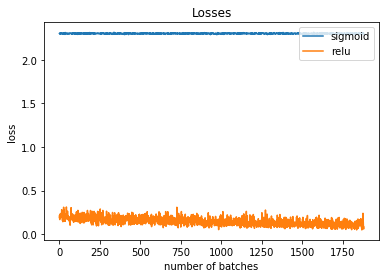

In [12]:
plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label='sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label='relu')
plt.title('Losses')
plt.xlabel('number of batches')
plt.ylabel('loss')
plt.legend(loc=1)
plt.show()

### Extract the maximum weights of each model per layer

In [13]:
w_sigmoid = []
w_relu = []
for i in range(len(model_sigmoid.layers)):
    w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))
    w_relu.append(max(model_relu.layers[i].get_weights()[1]))

### Plot the weights of both models

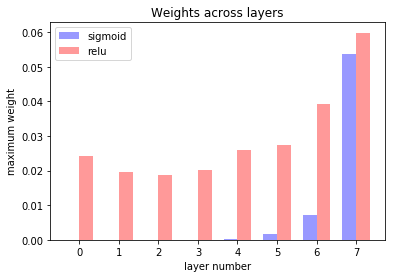

In [14]:
fig, ax = plt.subplots()

index = np.arange(len(model_sigmoid.layers))
bar_width = 0.35

plt.bar(index, w_sigmoid, bar_width, label='sigmoid', color='b', alpha=0.4)
plt.bar(index + bar_width, w_relu, bar_width, label='relu', color='r', alpha=0.4)
plt.title('Weights across layers')
plt.xlabel('layer number')
plt.ylabel('maximum weight')
plt.legend(loc=0)

plt.xticks(index + bar_width / 2, np.arange(8))
plt.show()